# Demonstration Unsymmetrical bending

The bending behaviour of the following beam is calculated:
![](./data_unsymmetrical_bending/Demonstration_1.png)

If you download this file you can play around with the actual widget

In [1]:
import sympy as sym
sym.init_printing()

In [2]:
x = sym.symbols('x')
F_z, F_y = sym.symbols('F_z F_y')
C1, C2, C3, C4, C5, C6, C7, C8 = sym.symbols('C1 C2 C3 C4 C5 C6 C7 C8')

qz = sym.SingularityFunction(x,750,-1)*1000 * F_z
qy = sym.SingularityFunction(x,750,-1)*1000 * F_y

In [3]:
Vz = -sym.integrate(qz,x) + C1
Mz = sym.integrate(Vz,x) + C2

Vy = -sym.integrate(qy,x) + C3
My  =sym.integrate(Vy,x) + C4


In [4]:
eq1 = sym.Eq(Mz.subs(x,0),0)
eq2 = sym.Eq(Mz.subs(x,1500),0)
eq3 = sym.Eq(My.subs(x,0),0)
eq4 = sym.Eq(My.subs(x,1500),0)
sol = sym.solve([eq1,eq2,eq3,eq4],(C1,C2,C3,C4))
Mz = Mz.subs(sol)
My = My.subs(sol)

In [5]:
b = 75
h = 150
t = 10
A = b*t+h*t - t*t
NC_z = ( (b-t) * t * t/2 + h * t * h / 2 ) / A
NC_y = ( (h-t)*t*t/2 + b * t * b / 2 ) / A
Izz = (1/12 * (b-t) * t **3 + 1/12 * t * h**3 + b * t * (NC_z-t/2)**2 + h * t * (NC_z - h/2)**2)/1e4
Iyy = (1/12 * t * b **3 + 1/12 * (h - t) * t**3 + h * t * (t/2-NC_y)**2 + b * t * (NC_y - b/2)**2)/1e4
Iyz = (b * t * (b/2 - NC_y) * (- NC_z+t/2) + h * t * (- NC_y+t/2) * (h / 2 - NC_z) - t * t * (-NC_y + t/2) * (-NC_z + t/2))/1e4

E = 210000
kappa_y = 1e-4/E*1/(Izz*Iyy-(-Iyz)**2)*( Izz*My - Iyz*Mz)
kappa_z = 1e-4/E*1/(Izz*Iyy-(-Iyz)**2)*( -Iyz*My + Iyy*Mz)

In [6]:
phi_y = sym.integrate(kappa_z,x) + C5
phi_z = -sym.integrate(kappa_y,x) + C6
w_y = sym.integrate(phi_z,x) + C7
w_z = -sym.integrate(phi_y,x) + C8

In [7]:
eq5 = sym.Eq(w_y.subs(x,0),0)
eq6 = sym.Eq(w_y.subs(x,1500),0)
eq7 = sym.Eq(w_z.subs(x,0),0)
eq8 = sym.Eq(w_z.subs(x,1500),0)
sol = sym.solve([eq5,eq6,eq7,eq8],(C5,C6,C7,C8))
y, z = sym.symbols('y z')

In [8]:
u = - y * phi_z + z * phi_y

sigma = E * (kappa_y * y + kappa_z * z)

sigma.subs(x,750).subs(y,75-15.83).subs(z,-51.67).subs(F_z,27).subs(F_y,9)
neutral_axis = sym.solve(sigma,z)[0]

In [9]:
w_y_num = sym.lambdify([x,F_z,F_y],w_y.subs(sol).rewrite(sym.Piecewise))
w_z_num = sym.lambdify([x,F_z,F_y],w_z.subs(sol).rewrite(sym.Piecewise))
u_num = sym.lambdify([x,F_z,F_y,y,z],u.subs(sol).rewrite(sym.Piecewise))
sigma = sym.lambdify([x,F_z,F_y,y,z],sigma.subs(sol).rewrite(sym.Piecewise))
neutral_axis = sym.lambdify([x,F_z,F_y,y],neutral_axis.subs(sol).rewrite(sym.Piecewise))

In [10]:
import matplotlib.pyplot as plt
import numpy as np
import ipywidgets as widgets
from mpl_toolkits.mplot3d.art3d import Poly3DCollection 
%matplotlib widget

In [11]:
def add_surface_between_lines(x_left, x_right, y_left, y_right, z_left, z_right, ax,color):
    for i in range(len(x_left)-1):
        vertices = []
        vertices.append([x_left[i], y_left[i], z_left[i]])
        vertices.append([x_right[i], y_right[i], z_right[i]])
        vertices.append([x_right[i+1], y_right[i+1], z_right[i+1]])
        surface = Poly3DCollection([vertices], alpha=0.5, facecolor=color)
        ax.add_collection3d(surface)
    for i in range(len(x_left)-1):
        vertices = []
        vertices.append([x_left[i], y_left[i], z_left[i]])
        vertices.append([x_right[i+1], y_right[i+1], z_right[i+1]])
        vertices.append([x_left[i+1], y_left[i+1], z_left[i+1]])
        surface = Poly3DCollection([vertices], alpha=0.5, facecolor=color)
        ax.add_collection3d(surface)


interactive(children=(IntSlider(value=27, description='Fz:', max=40), IntSlider(value=9, description='Fy:', ma…

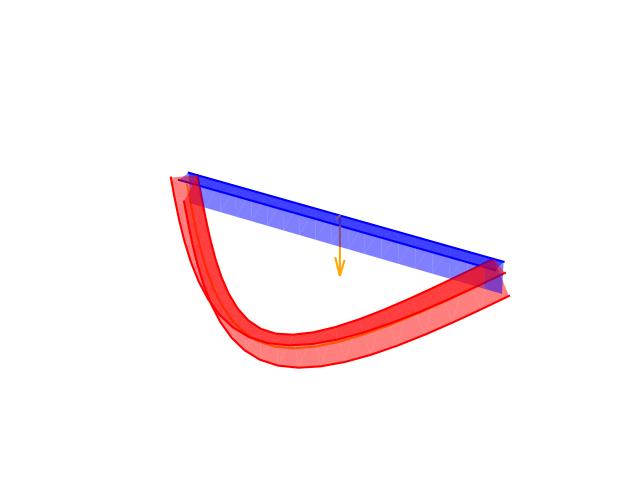

In [12]:
Fz_slider = widgets.IntSlider(value=27, min=0, max=40, step=1, description='Fz:')
Fy_slider = widgets.IntSlider(value=9, min=0, max=40, step=1, description='Fy:')
scale_slider = widgets.IntSlider(value=71, min=1, max=100, step=10, description='Scale:')

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Define a function to update the plot based on the slider values
def update_plot(Fz, Fy, scale):
    ax.clear()  # Clear the existing plot
    x_num = np.linspace(0, 1500, 20)

    ax.set_ylim3d(-16, 100)
    ax.set_zlim3d(-52, 100)
    ax.set_xlim3d(0, 1500)
    ax.invert_zaxis()
    ax.invert_yaxis()
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('z')
    ax.set_aspect('equal')
    ax.set_axis_off()
    ax.quiver(750, -15.83, -51.67, 0, 0, Fz, length=Fz/50*20, normalize=False, color='orange')
    ax.quiver(750, -15.83, -51.67, 0, Fy, 0, length=Fy/50*20, normalize=False, color='orange')

    w_y_eval = w_y_num(x_num, F_z=Fz, F_y=Fy) * scale
    w_z_eval = w_z_num(x_num, F_z=Fz, F_y=Fy) * scale

    ax.plot(x_num, w_y_eval, w_z_eval, color='orange')

    y_left = np.ones_like(x_num) * (75 - 15.83)
    y_right = np.ones_like(x_num) * (-15.83)
    z_left = np.ones_like(x_num) * -51.67
    z_right = np.ones_like(x_num) * -51.67
    x_left = x_num + u_num(x_num, F_z=Fz, F_y=Fy, y=y_left, z=z_left) * scale
    x_right = x_num + u_num(x_num, F_z=Fz, F_y=Fy, y=y_right, z=z_right) * scale
    add_surface_between_lines(x_left, x_right, w_y_eval + y_left, w_y_eval + y_right, w_z_eval + z_left, w_z_eval + z_right, ax, color='red')
    ax.plot(x_left, w_y_eval + y_left, w_z_eval + z_left, color='red')
    ax.plot(x_right, w_y_eval + y_right, w_z_eval + z_right, color='red')

    y_left = np.ones_like(x_num) * (-15.83)
    z_left = np.ones_like(x_num) * (150 - 51.67)
    x_left = x_num + u_num(x_num, F_z=Fz, F_y=Fy, y=y_left, z=z_left) * scale
    add_surface_between_lines(x_left, x_right, w_y_eval + y_left, w_y_eval + y_right, w_z_eval + z_left, w_z_eval + z_right, ax, color='red')
    ax.plot(x_left, w_y_eval + y_left, w_z_eval + z_left, color='red')

    y_left = np.ones_like(x_num) * (75 - 15.83)
    y_right = np.ones_like(x_num) * (-15.83)
    z_left = np.ones_like(x_num) * -51.67
    z_right = np.ones_like(x_num) * -51.67
    add_surface_between_lines(x_num, x_num, y_left, y_right, z_left, z_right, ax, color='blue')
    ax.plot(x_num, y_left, z_left, color='blue')
    ax.plot(x_num, y_right, z_right, color='blue')

    y_left = np.ones_like(x_num) * (-15.83)
    z_left = np.ones_like(x_num) * (150 - 51.67)
    add_surface_between_lines(x_num, x_num, y_left, y_right, z_left, z_right, ax, color='blue')

    plt.draw()  # Redraw the updated plot

# Display the sliders and the plot
widgets.interact(update_plot, Fz=Fz_slider, Fy=Fy_slider, scale=scale_slider);


interactive(children=(IntSlider(value=27, description='Fz:', max=40), IntSlider(value=9, description='Fy:', ma…

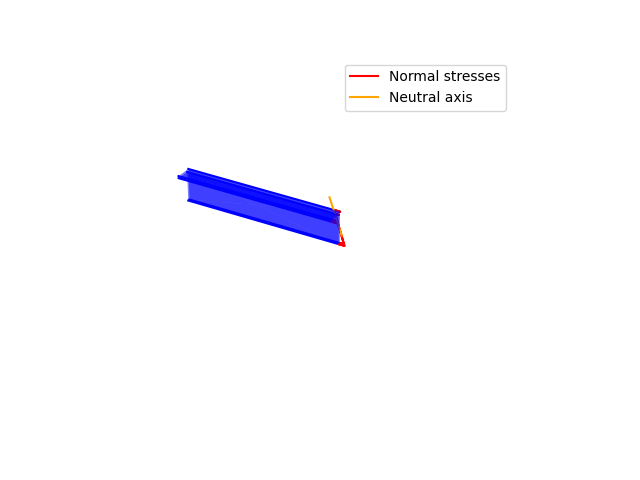

In [13]:
Fz_slider = widgets.IntSlider(value=27, min=0, max=40, step=1, description='Fz:')
Fy_slider = widgets.IntSlider(value=9, min=0, max=40, step=1, description='Fy:')
x_slider = widgets.IntSlider(value=750, min=0, max=1500, step=50, description='x:')

sigma_left = sigma(np.linspace(0,1500,100),40,40,75-15.83,-51.67)
sigma_right = sigma(np.linspace(0,1500,100),40,40,-15.83,-51.67)
sigma_bottom = sigma(np.linspace(0,1500,100),40,40,-15.83,150-51.67)
sigma_max = max(max(sigma_left),max(sigma_right),max(sigma_bottom))

scale = 1/sigma_max*100

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

saved_elev, saved_azim = ax.elev, ax.azim

ax.set_ylim3d(-16, 100)
ax.set_zlim3d(-52, 100)
ax.set_xlim3d(0, 1500)
ax.invert_zaxis()
ax.invert_yaxis()

def update_plot(Fz, Fy, x_stress):
    xlim_saved = ax.get_xlim3d()
    ylim_saved = ax.get_ylim3d()
    zlim_saved = ax.get_zlim3d()
    #elev_saved = ax.elev
    #azim_saved = ax.azim

    ax.clear()  # Clear the existing plot
    x_num = np.linspace(0, x_stress, 2)

    #ax.view_init(elev_saved, azim_saved)
    ax.set_ylim3d(ylim_saved)
    ax.set_zlim3d(ylim_saved)
    ax.set_xlim3d(xlim_saved)
        
    ax.set_aspect('equal')
    ax.set_axis_off() 

    y_left = np.ones_like(x_num) * (75 - 15.83)
    y_right = np.ones_like(x_num) * (-15.83)
    z_left = np.ones_like(x_num) * -51.67
    z_right = np.ones_like(x_num) * -51.67
    ax.plot(x_num, y_left, z_left, color='blue')
    add_surface_between_lines(x_num, x_num, y_left, y_right, z_left, z_right, ax, color='blue')
    ax.plot(x_num, y_left, z_left+10, color='blue')
    add_surface_between_lines(x_num, x_num, y_left, y_left, z_left, z_left+10, ax, color='blue')
    ax.plot(x_num, y_right, z_left, color='blue')
    ax.plot(x_num, y_right+10, z_left+10, color='blue')
    add_surface_between_lines(x_num, x_num, y_right+10, y_left, z_left+10, z_left+10, ax, color='blue')

    y_left = np.ones_like(x_num) * (-15.83)
    z_left = np.ones_like(x_num) * (150 - 51.67)
    add_surface_between_lines(x_num, x_num, y_left, y_right, z_left, z_right, ax, color='blue')
    ax.plot(x_num, y_left, z_left, color='blue')
    add_surface_between_lines(x_num, x_num, y_left, y_left+10, z_left, z_left, ax, color='blue')
    ax.plot(x_num, y_left+10, z_left, color='blue')
    add_surface_between_lines(x_num, x_num, y_left+10, y_left+10, z_right+10, z_left, ax, color='blue')

    y_list = [75-15.83,-15.83,-15.83,-15.83+10,-15.83+10,75-15.83,75-15.83]
    z_list = [-51.67,-51.67,150-51.67,150-51.67,-51.67+10,-51.67+10,-51.67]
    sigma_A = sigma(x_stress,Fz,Fy,75-15.83,-51.67)
    sigma_B = sigma(x_stress,Fz,Fy,-15.83,-51.67)
    sigma_C = sigma(x_stress,Fz,Fy,75-15.83,-51.67+10)
    sigma_D = sigma(x_stress,Fz,Fy,-15.83+10,150-51.67)
    sigma_E = sigma(x_stress,Fz,Fy,-15.83,150-51.67)
    sigma_F = sigma(x_stress,Fz,Fy,-15.83+10,-51.67+10)
    x_stresses = []
    y_stresses = []
    z_stresses = []
    for i in range(len(y_list)):
        x_stresses.append(x_stress + scale * sigma(x_stress,Fz,Fy,y_list[i],z_list[i]))
        x_stresses.append(x_stress)
        x_stresses.append(x_stress + scale * sigma(x_stress,Fz,Fy,y_list[i],z_list[i]))
        y_stresses.append(y_list[i])
        y_stresses.append(y_list[i])
        y_stresses.append(y_list[i])
        z_stresses.append(z_list[i])
        z_stresses.append(z_list[i])
        z_stresses.append(z_list[i])

    ax.plot(x_stresses, y_stresses,z_stresses, color='red',label='Normal stresses')

    ax.plot([x_stress,x_stress], [-30,70],[neutral_axis(x_stress,Fz,Fy,-30),neutral_axis(x_stress,Fz,Fy,70)], color='orange',label='Neutral axis')

    ax.legend()
    plt.draw()  # Redraw the updated plot   


# Display the sliders and the plot
widgets.interact(update_plot, Fz=Fz_slider, Fy=Fy_slider, x_stress = x_slider);